# 6.3 Geographic Visualization
This script contains the following:¶
1. Import data and libraries
2. Data wrangling
3. Data cleaning
4. Plotting a choropleth

# 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
%matplotlib inline

In [2]:
# Import ".json" file for the U.S. 
country_geo = r"C:\Users\bukola\Documents\CF\6.1 Sourcing Open Data\script\us-states.json"

In [3]:
#  looking at the JSON file contents:

f = open(r"C:\Users\bukola\Documents\CF\6.1 Sourcing Open Data\script\us-states.json",)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [4]:
# Import the superstore data
df = pd.read_csv(r"C:\Users\bukola\Documents\CF\6.1 Sourcing Open Data\Prepared Data\Superstore_clean.csv")

In [5]:
df.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.shape

(9994, 21)

# 2. Data wrangling

In [7]:
# Check for missing values

df.isnull().sum()

Unnamed: 0      0
Row ID          0
Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
# checking for duplicates 
dups = df.duplicated()

In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
dups.shape

(9994,)

In [11]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

<Axes: xlabel='Quantity', ylabel='Count'>

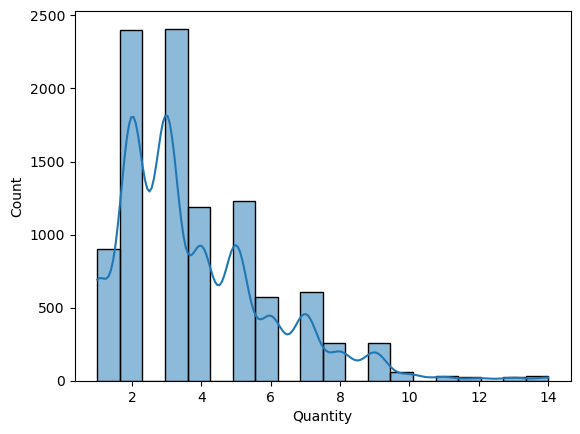

In [12]:
sns.histplot(df['Quantity'], bins=20, kde = True) # shows extreme values for 'Quantity'

<Axes: xlabel='Discount', ylabel='Count'>

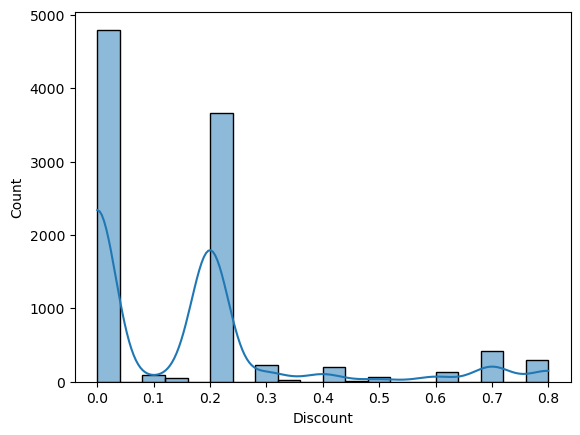

In [13]:
#Created a histogram for extreme values for discount
sns.histplot(df['Discount'], bins=20, kde = True) # shows extreme values for 'Discount '

<Axes: xlabel='Sales', ylabel='Count'>

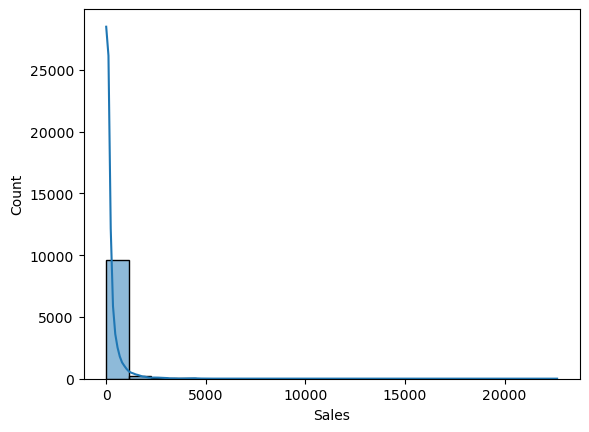

In [14]:
#Created a histogram for extreme values for sales
sns.histplot(df['Sales'], bins=20, kde = True) # shows extreme values for 'Sales '

<Axes: xlabel='Profit', ylabel='Count'>

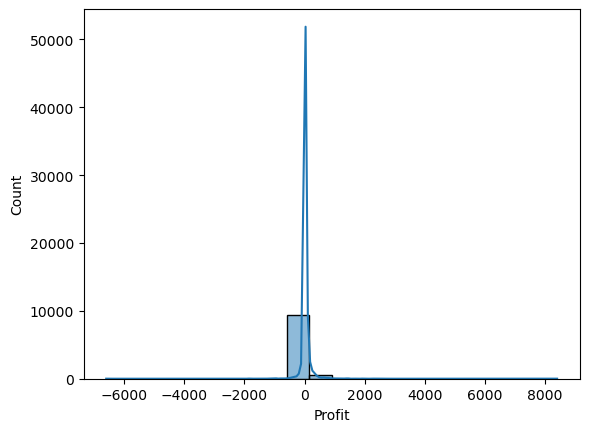

In [15]:
sns.histplot(df['Profit'], bins=20, kde = True) # shows extreme values for 'profit'

In [16]:
# Check how many extreme values

df[df['Profit'] > 0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
5,6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2015-110422,2015-01-21,2015-01-23,Second Class,TB-21400,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [17]:
# Clean extreme values

df = df[df['Profit'] >= 0] 
# 0 was picked because it is beyond belief there could be a business that will run bellow is breakeven level!

In [18]:
df.shape

(8123, 20)

# 4. Plotting a Choropleth

In [19]:
## Create a data frame with just the states and the profit for map to be plotted

data_to_plot = df[['State','Profit']]
data_to_plot.head()

,State,Profit
0,Kentucky,41.9136
1,Kentucky,219.5820
2,California,6.8714
4,Florida,2.5164
5,California,14.1694


In [20]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['State', 'Profit'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Profit").add_to(map)
folium.LayerControl().add_to(map)

map

In [21]:
map.save('plot_data1.html')

In [22]:
## Create a data frame with just the states and the profit for map to be plotted

data_to_plot2 = df[['State','Sales']]
data_to_plot2.head()

,State,Sales
0,Kentucky,261.960
1,Kentucky,731.940
2,California,14.620
4,Florida,22.368
5,California,48.860


In [23]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot2,
    columns = ['State', 'Sales'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Sales").add_to(map)
folium.LayerControl().add_to(map)

map

In [24]:
map.save('plot_data12.html')

In [25]:
## Create a data frame with just the states and the profit for map to be plotted

data_to_plot3 = df[['State','Quantity']]
data_to_plot3.head()

,State,Quantity
0,Kentucky,2
1,Kentucky,3
2,California,2
4,Florida,2
5,California,7


In [26]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot3,
    columns = ['State', 'Quantity'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Quantity").add_to(map)
folium.LayerControl().add_to(map)

map

In [27]:
map.save('plot_data3.html')

In [28]:
## Create a data frame with just the states and the proDiscountfit for map to be plotted

data_to_plot4 = df[['State','Discount']]
data_to_plot4.head()

,State,Discount
0,Kentucky,0.0
1,Kentucky,0.0
2,California,0.0
4,Florida,0.2
5,California,0.0


In [29]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot4,
    columns = ['State', 'Discount'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Discount").add_to(map)
folium.LayerControl().add_to(map)

map

In [30]:
map.save('plot_data4.html')

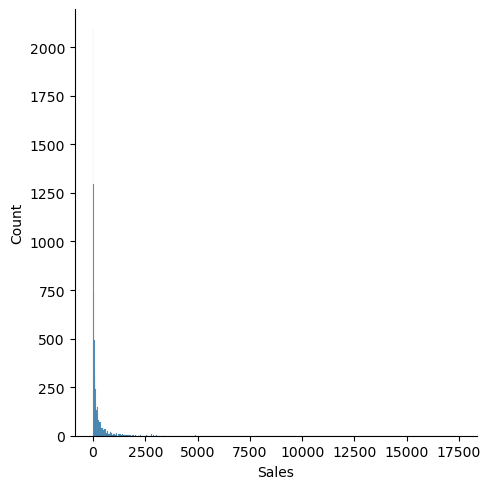

In [32]:
sns.displot(x= 'Sales', data = df)

In [33]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000
mean,4968.371291,55005.941278,225.100789,3.795765,0.081417,54.478433
std,2874.275837,33295.504258,600.056721,2.244043,0.099192,212.913326
min,1.000000,1040.000000,0.990000,1.000000,0.000000,0.000000
25%,2481.000000,21477.500000,17.940000,2.000000,0.000000,5.193000
50%,4967.000000,53711.000000,51.750000,3.000000,0.000000,13.070700
75%,7435.500000,90045.000000,195.640000,5.000000,0.200000,40.170200
max,9994.000000,99301.000000,17499.950000,14.000000,0.400000,8399.976000


# Determine the outlier for sales and capping the sales using IQR

In [34]:
#determine the outlier for sales

q1 = df['Sales'].quantile(0.25)
q3 = df['Sales'].quantile(0.75)
IQR = q3-q1

In [35]:
q1,q3,IQR

(17.94, 195.64, 177.7)

In [36]:
df[((df['Sales']<(q1-1.5*IQR)) | (df['Sales']>(q3+1.5*IQR)))]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
7,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
10,11,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.184,9,0.2,85.3092
11,12,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
16,17,CA-2015-105893,2015-11-11,2015-11-18,Standard Class,PK-19075,Consumer,United States,Madison,Wisconsin,53711,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.880,6,0.0,13.3176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9929,9930,CA-2017-129630,2017-09-04,2017-09-04,Same Day,IM-15055,Consumer,United States,San Francisco,California,94122,West,TEC-CO-10003763,Technology,Copiers,Canon PC1060 Personal Laser Copier,2799.960,5,0.2,944.9865
9942,9943,CA-2015-143371,2015-12-28,2016-01-03,Standard Class,MD-17350,Consumer,United States,Anaheim,California,92804,West,OFF-ST-10001128,Office Supplies,Storage,"Carina Mini System Audio Rack, Model AR050B",998.820,9,0.0,29.9646
9947,9948,CA-2018-121559,2018-06-01,2018-06-03,Second Class,HW-14935,Corporate,United States,Indianapolis,Indiana,46203,Central,FUR-CH-10003746,Furniture,Chairs,Hon 4070 Series Pagoda Round Back Stacking Chairs,1925.880,6,0.0,539.2464
9948,9949,CA-2018-121559,2018-06-01,2018-06-03,Second Class,HW-14935,Corporate,United States,Indianapolis,Indiana,46203,Central,OFF-AP-10002945,Office Supplies,Appliances,Honeywell Enviracaire Portable HEPA Air Cleane...,2405.200,8,0.0,793.7160


# finding the uperlimit and lower limit for sales 

In [37]:
upper_limit = df['Sales'].mean() + 3*df['Sales'].std()

print(upper_limit)

lower_limit = df['Sales'].mean() - 3*df['Sales'].std()

print(lower_limit)

2025.2709513743387
-1575.0693742476612


In [38]:
df['Sales'] = np.where(df['Sales'] > upper_limit,upper_limit,
np.where(df['Sales'] < lower_limit,lower_limit,df['Sales']))

In [39]:
df.describe()[['Sales']]

,Sales
count,8123.000000
mean,199.590108
std,367.803767
min,0.990000
25%,17.940000
50%,51.750000
75%,195.640000
max,2025.270951


In [40]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
5,6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2015-110422,2015-01-21,2015-01-23,Second Class,TB-21400,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


<Axes: xlabel='Sales'>

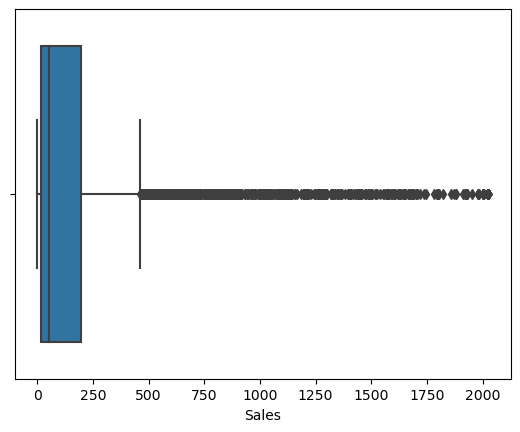

In [41]:
sns.boxplot(x= 'Sales', data = df)

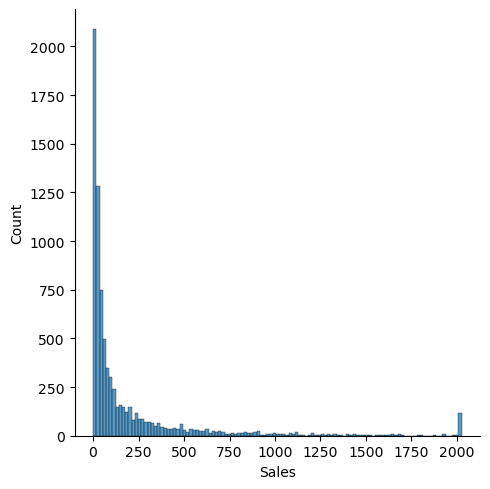

In [42]:
sns.displot(df['Sales'])

In this context of sales data, right skewness suggests that while a significant portion of sales might be relatively low, there are occasional instances of exceptionally high sales

In [43]:
## Create a data frame with just the states and the sales for map to be plotted

data_to_plot5 = df[['State','Sales']]
data_to_plot5.head()

,State,Sales
0,Kentucky,261.960
1,Kentucky,731.940
2,California,14.620
4,Florida,22.368
5,California,48.860


In [44]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot5,
    columns = ['State', 'Sales'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Sales").add_to(map)
folium.LayerControl().add_to(map)

map

    
   The Choropleth map effectively visualizes the evolution of sales trends across states from 2015 to 2019, offering a geographical representation of how sales have evolved over the specified time frame. By representing sales data on a state-level Choropleth map, significant geographical variations in sales become apparent, providing a clear understanding of how sales differ based on regional factors.

In summary, the Choropleth map serves as a powerful tool for addressing diverse inquiries related to sales trends, patterns, and influencing factors, offering a geographical context that enhances the understanding of regional variations in the dataset.

Questions to Explore further : i will to To explore further on how shipping mode could affect sales, consider the following questions:How does each shipping mode impact the delivery time of products to customers?
Are there correlations between faster delivery times and increased sales?